In [1]:
# http://snap.stanford.edu/class/cs224w-2016/projects/cs224w-6-final.pdf

In [26]:
import os, sys
sys.path.append('..')
sys.path.insert(0,'../submodule/m-phate')

In [27]:
import m_phate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
import scprep

In [28]:
n_nodes = 54
T = 1000

In [29]:
with open('/Users/orange3xchicken/Downloads/connectivity.txt', 'r') as f:
    connectivity = f.read().splitlines()

In [30]:
connectivity = [[float(c) for c in conn.split()] for conn in connectivity]

In [31]:
# ignore this
with open('/Users/orange3xchicken/Downloads/mote_locs.txt', 'r') as f:
    mote_locs = f.read().splitlines()

In [32]:
mote_locs = [[float(m) for m in ml.split()] for  ml in mote_locs ]

In [33]:
with open('/Users/orange3xchicken/Downloads/data.txt', 'r') as f:
    data = f.read().splitlines()

In [34]:
data = [[float(d) for d in da.split()[2:]] for  da in tqdm(data)]

In [35]:
adj = np.zeros((n_nodes, n_nodes))

In [36]:
for c in tqdm(connectivity):
    if len(c) < 3:
        continue
    else:
        adj[int(c[0])-1, int(c[1])-1] = c[2]

In [37]:
data[:5]

[[2.0, 1.0, 122.153, -3.91901, 11.04, 2.03397],
 [3.0, 1.0, 19.9884, 37.0933, 45.08, 2.69964],
 [11.0, 1.0, 19.3024, 38.4629, 45.08, 2.68742],
 [17.0, 1.0, 19.1652, 38.8039, 45.08, 2.68742],
 [18.0, 1.0, 19.175, 38.8379, 45.08, 2.69964]]

In [38]:
node_features = [[] for _ in range(n_nodes)]
for d in tqdm(data):
    if d[0] > T:
        continue
    try:
        node_features[int(d[1]-1)].append([d[0]] + d[2:])
    except:
        print(d)

[2.0, 55.0, 26.2114, 43.4524, 97.52, 3.04574]
[2.0, 55.0, 22.017, 41.7805, 279.68, 3.04574]
[2.0, 55.0, 25.4274, 33.3507, 93.84, 3.0302]
[2.0, 55.0, 25.0158, 33.979, 97.52, 3.0302]
[4.0, 55.0, 26.28, 35.2995, 217.12, 3.0302]
[4.0, 55.0, 23.3498, 37.3679, 75.44, 2.9996]
[5.0, 55.0, 23.5066, 37.0246, 75.44, 2.9996]
[5.0, 55.0, 23.977, 35.6456, 412.16, 3.09333]
[6.0, 55.0, 25.8194, 33.0709, 202.4, 3.12589]
[7.0, 55.0, 22.9676, 37.745, 831.68, 3.09333]
[8.0, 55.0, 22.85, 37.8477, 655.04, 3.09333]
[9.0, 55.0, 22.7814, 38.2922, 890.56, 3.09333]
[10.0, 55.0, 22.703, 38.258, 537.28, 3.09333]
[13.0, 55.0, 24.565, 34.9181, 68.08, 3.01482]
[24.0, 55.0, 22.5952, 38.6675, 97.52, 3.07731]
[25.0, 55.0, 22.4678, 38.7357, 71.76, 3.0302]
[56.0, 55.0, 25.4176, 33.3507, 90.16, 3.01482]
[57.0, 55.0, 25.2216, 33.5604, 86.48, 3.01482]
[58.0, 55.0, 25.1432, 33.7698, 90.16, 3.01482]
[60.0, 55.0, 24.8688, 34.2925, 97.52, 3.01482]
[61.0, 55.0, 24.7708, 34.4664, 97.52, 3.01482]
[114.0, 55.0, 25.104, 41.5789, 1081

In [39]:
node_data = []
for nf in tqdm(node_features):
    node_array = np.empty((T, len(node_features[0][0])-1))
    node_array[:] = np.NaN
    for ts in nf:
        for feat in ts[1:]:
            node_array[int(ts[0])-1] = feat
    mask = np.isnan(node_array).T
    idx = np.where(~mask,np.arange(mask.shape[1]),0)
    np.maximum.accumulate(idx, axis=1, out=idx)
    out = node_array.T[np.arange(idx.shape[0])[:,None], idx]
    out = np.nan_to_num(out,0).T
    node_data.append(out)

In [40]:
X_tr= np.stack(node_data, axis=0)

In [41]:
X_tr.shape

(54, 1000, 4)

In [42]:
X_tr = X_tr.transpose(1,0,2)

In [43]:
X_tr.shape

(1000, 54, 4)

In [59]:
m_phate_op = m_phate.M_PHATE(normalize=False, n_components=3, n_jobs=-2, intraslice_knn=2,interslice_knn=40)
m_phate_data = m_phate_op.fit_transform(X_tr)

Calculating M-PHATE...
  Calculating multislice kernel...
  Calculated multislice kernel in 14.48 seconds.
  Calculating graph and diffusion operator...
    Calculating landmark operator...
      Calculating SVD...
      Calculated SVD in 33.26 seconds.
      Calculating KMeans...
      Calculated KMeans in 44.84 seconds.
    Calculated landmark operator in 82.51 seconds.
  Calculated graph and diffusion operator in 84.33 seconds.
  Running PHATE on precomputed affinity matrix with 54000 cells.
  Calculating optimal t...
  Calculated optimal t in 12.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 5.17 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 818.95 seconds.
Calculated M-PHATE in 935.88 seconds.


In [60]:
adj.shape

(54, 54)

In [76]:
nodeid = np.tile(np.arange(n_nodes), T)
#nodeid = np.tile(np.isin(np.arange(n_nodes),[13,32,51])*np.arange(n_nodes), T)
#nodeid = np.repeat(np.arange(T), n_nodes)

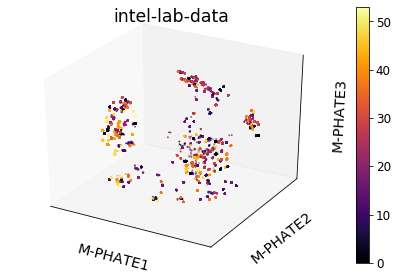

In [77]:
scprep.plot.scatter3d(m_phate_data, c=nodeid, ticks=False, title='intel-lab-data', label_prefix="M-PHATE",filename=None)